In [1]:
from fastai.vision.all import *
from models.AE import AutoEncoder
from torchsummary import summary

In [2]:
path = untar_data(URLs.MNIST, dest='data')

In [3]:
path.ls()

(#2) [Path('data/mnist_png/training'),Path('data/mnist_png/testing')]

In [4]:
Path.BASE_PATH = path

In [5]:
img3 = get_image_files(path/'training'/'3')[0]

In [6]:
Image.open(img3)

In [7]:
data_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42)
)

In [8]:
data_sets = data_block.datasets(path)

In [9]:
data_sets.train[0]

(PILImageBW mode=L size=28x28, PILImageBW mode=L size=28x28)

<AxesSubplot:>

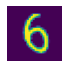

In [10]:
show_image(data_sets.train[0][0])

<AxesSubplot:>

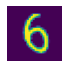

In [11]:
show_image(data_sets.train[0][1])

<AxesSubplot:>

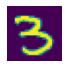

In [12]:
show_image(data_sets.train[10][0])

<AxesSubplot:>

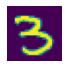

In [13]:
show_image(data_sets.train[10][1])

In [14]:
data_loaders = data_block.dataloaders(path)

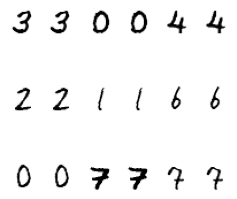

In [15]:
data_loaders.show_batch(max_n=9, figsize=(4,4))

In [16]:
model = AutoEncoder(
    input_dim=[1, 28, 28],
    conv_filters=[32, 64, 64, 64],
    conv_t_filters=[64, 64, 32, 1],
    kernel_sizes=[3, 3, 3, 3],
    strides=[1, 2, 2, 1],
    z_dim=2
)

In [17]:
summary(model.encoder, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 28, 28]          320
├─LeakyReLU: 1-2                         [-1, 32, 28, 28]          --
├─Conv2d: 1-3                            [-1, 64, 14, 14]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 14, 14]          --
├─Conv2d: 1-5                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-6                         [-1, 64, 7, 7]            --
├─Conv2d: 1-7                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-8                         [-1, 64, 7, 7]            --
├─Flatten: 1-9                           [-1, 3136]                --
├─Linear: 1-10                           [-1, 2]                   6,274
Total params: 98,946
Trainable params: 98,946
Non-trainable params: 0
Total mult-adds (M): 7.46
Input size (MB): 0.00
Forward/backward pass size (MB): 0.33
Params size (MB): 0.38
Estimated Total Size (MB): 0.7

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 28, 28]          320
├─LeakyReLU: 1-2                         [-1, 32, 28, 28]          --
├─Conv2d: 1-3                            [-1, 64, 14, 14]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 14, 14]          --
├─Conv2d: 1-5                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-6                         [-1, 64, 7, 7]            --
├─Conv2d: 1-7                            [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-8                         [-1, 64, 7, 7]            --
├─Flatten: 1-9                           [-1, 3136]                --
├─Linear: 1-10                           [-1, 2]                   6,274
Total params: 98,946
Trainable params: 98,946
Non-trainable params: 0
Total mult-adds (M): 7.46
Input size (MB): 0.00
Forward/backward pass size (MB): 0.33
Params size (MB): 0.38
Estimated Total Size (MB): 0.7

In [18]:
summary(model.decoder, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 3136]                9,408
├─Unflatten: 1-2                         [-1, 64, 7, 7]            --
├─ConvTranspose2d: 1-3                   [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-4                         [-1, 64, 7, 7]            --
├─ConvTranspose2d: 1-5                   [-1, 64, 14, 14]          36,928
├─LeakyReLU: 1-6                         [-1, 64, 14, 14]          --
├─ConvTranspose2d: 1-7                   [-1, 32, 28, 28]          18,464
├─LeakyReLU: 1-8                         [-1, 32, 28, 28]          --
├─ConvTranspose2d: 1-9                   [-1, 1, 28, 28]           289
├─Sigmoid: 1-10                          [-1, 1, 28, 28]           --
Total params: 102,017
Trainable params: 102,017
Non-trainable params: 0
Total mult-adds (M): 23.71
Input size (MB): 0.00
Forward/backward pass size (MB): 0.34
Params size (MB): 0.39
Estimated Total Size (MB): 

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 3136]                9,408
├─Unflatten: 1-2                         [-1, 64, 7, 7]            --
├─ConvTranspose2d: 1-3                   [-1, 64, 7, 7]            36,928
├─LeakyReLU: 1-4                         [-1, 64, 7, 7]            --
├─ConvTranspose2d: 1-5                   [-1, 64, 14, 14]          36,928
├─LeakyReLU: 1-6                         [-1, 64, 14, 14]          --
├─ConvTranspose2d: 1-7                   [-1, 32, 28, 28]          18,464
├─LeakyReLU: 1-8                         [-1, 32, 28, 28]          --
├─ConvTranspose2d: 1-9                   [-1, 1, 28, 28]           289
├─Sigmoid: 1-10                          [-1, 1, 28, 28]           --
Total params: 102,017
Trainable params: 102,017
Non-trainable params: 0
Total mult-adds (M): 23.71
Input size (MB): 0.00
Forward/backward pass size (MB): 0.34
Params size (MB): 0.39
Estimated Total Size (MB): 

In [19]:
def rmse_loss(inp, targ, **kwargs):
    return torch.sqrt(F.mse_loss(inp, targ, **kwargs))

In [20]:
learner = Learner(
    dls=data_loaders,
    model=model,
    loss_func=rmse_loss
)

SuggestedLRs(valley=0.007585775572806597)

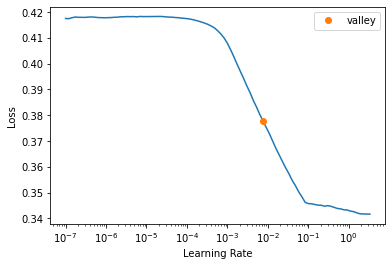

In [21]:
learner.lr_find()

In [22]:
learner.fit(10, 3e-3)

epoch,train_loss,valid_loss,time
0,0.207850,0.208568,00:28
1,0.205092,0.204270,00:31
2,0.201580,0.201875,00:28
3,0.199230,0.199956,00:28
4,0.199129,0.200074,00:28
5,0.196983,0.198088,00:28
6,0.196886,0.197498,00:28
7,0.196235,0.196324,00:28
8,0.195405,0.196884,00:30
9,0.194812,0.196681,00:29


In [23]:
learner.export()